# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Research question

As I/O professionals, we will explore a hypothetical dataset relating personality and social skills to evaluate the potential customer service skills of new hires.

**RQ1: Can we improve our prediction of customer service skills by including an interaction effect between extraversion and social skills of job applicants?**

# Q1) Install & load packages

We need to install two packages:
- easystats
- interactions

Three packages to load:
- easystats
- tidyverse
- interactions

In [1]:
## Install packages
install.packages("easystats")
install.packages("interactions")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘coda’, ‘furrr’, ‘zoo’, ‘broom.mixed’, ‘pander’, ‘sandwich’, ‘jtools’




In [2]:
## Load packages
library(easystats)
library(tidyverse)
library(interactions)

# Attaching packages: easystats 0.7.4
✔ bayestestR  0.15.2   ✔ correlation 0.8.7 
✔ datawizard  1.0.0    ✔ effectsize  1.0.0 
✔ insight     1.1.0    ✔ modelbased  0.9.0 
✔ performance 0.13.0   ✔ parameters  0.24.1
✔ report      0.6.1    ✔ see         0.10.0


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load the dataset

These data are simulated (i.e., fake) but were designed with realistic parameter values based on research. Run the code below to load the data from Casey's GitHub.

The data contain the following information:

- Extraversion (Numeric): Aggregated scores on the extraversion dimension of personality.

- SocialSkills (Numeric): An aggregated score of multiple social skill component variables.

- CustomerService (Numeric): Performance ratings on the task of customer service of employed individuals.

In [10]:
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6290/refs/heads/main/Datasets/CustomerService.csv"

## Read the csv file from GitHub and create a new object
SelectionData <- read_csv(url(FileURL))

## Check out the dataset
head(SelectionData, n = 10)

Rows: 200 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Extraversion, SocialSkills, CustomerService

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Extraversion,SocialSkills,CustomerService
<dbl>,<dbl>,<dbl>
44,93,56
48,80,62
66,56,49
51,68,72
51,54,48
67,53,46
55,48,18
37,51,26
43,85,86


# Q2) Standardize each of the three continuous variables in our dataset

Standardize the three numeric variables to be in standardized (i.e., z-score) form. You may use whichever approach you'd like. Note: It is a good idea to run descriptive statistics on the standardized data to ensure they have a mean of 0 and SD of 1.

In [11]:
## Standardize variables
CleanData <- SelectionData %>%
  mutate(Extraversion = scale(Extraversion),
         SocialSkills = scale(SocialSkills),
         CustomerService = scale(CustomerService))

# Q3) Estimate a main-effects model

Estimate the baseline regression model to represent our main research question.

Recall: **RQ1: Can we improve our prediction of customer service skills by including an interaction effect between extraversion and social skills of job applicants?**

In [12]:
## Estimate main effects model for RQ1
MEMod <- lm(CustomerService ~ -1 + Extraversion + SocialSkills, data = CleanData)

## Extract parameters
parameters(MEMod)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Extraversion,0.4166495,0.05152496,0.95,0.3150414,0.5182576,8.086363,198,6.024254e-14
SocialSkills,0.5622457,0.05152496,0.95,0.4606376,0.6638538,10.912104,198,5.213642e-22


# Q4) Estimate an interaction-effects model

Estimate the interaction-effects model to represent our main research question.

Recall: **RQ1: Can we improve our prediction of customer service skills by including an interaction effect between extraversion and social skills of job applicants?**

In [13]:
## Esimate interaction model for RQ1
IEMod <- lm(CustomerService ~ -1 + Extraversion * SocialSkills, data = CleanData)

## Extract parameters
parameters(IEMod)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Extraversion,0.3962317,0.05154161,0.95,0.29458762,0.4978759,7.687610,197,6.954456e-13
SocialSkills,0.5618902,0.05087433,0.95,0.46156199,0.6622184,11.044669,197,2.203036e-22
Extraversion:SocialSkills,0.1253586,0.05076292,0.95,0.02525012,0.2254671,2.469492,197,1.438137e-02


# Q5) Compare model fit across both models

a) Use one of the available functions to show the coefficients of determination (i.e., $R^2$) for both the main- and interaction-effects models.

b) Calculate the difference between the coefficients of determination (i.e., calculate $\Delta R^2$)

In [14]:
## Coefficients of determination
r2(MEMod)
r2(IEMod)

# R2 for Linear Regression
       R2: 0.475
  adj. R2: 0.470

# R2 for Linear Regression
       R2: 0.491
  adj. R2: 0.483

# Q6) Create a simple slopes visualization

Create a simple slopes visualization of the interaction effect model that (a) places Extraversion as the x-axis predictor and (b) SocialSkills as the 'held constant' variable with (c) levels of the SocialSkills variable held constant at -1, 0, and 1.

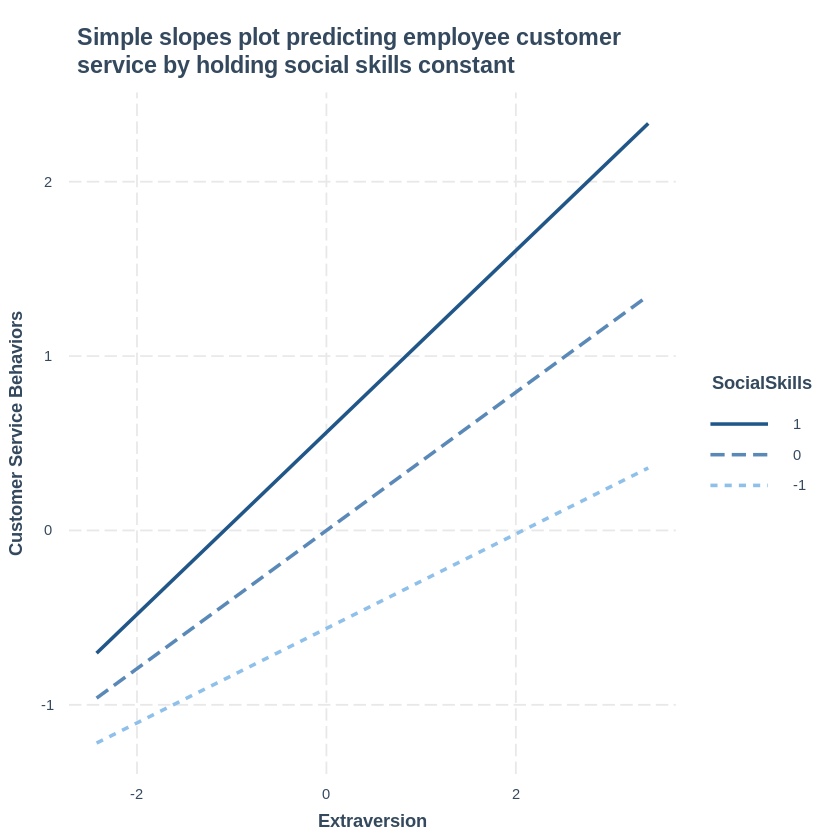

In [17]:
## Simple slopes visualization
interact_plot(IEMod,
              pred        = "Extraversion",
              modx        = "SocialSkills",
              modx.values = c(-1, 0, 1),
              x.label     = "Extraversion",
              y.label     = "Customer Service Behaviors",
              main.title  = "Simple slopes plot predicting employee customer \nservice by holding social skills constant")

# Q7) Answer in words what your conclusions are about the main research question

Recall our main RQ: **Can we improve our prediction of customer service skills by including an interaction effect between extraversion and social skills of job applicants?**

To answer your question, examine (a) the coefficients of determination, (b) model parameters, and (c) the simple slopes graph to make a judgment call. Do we have support that an interaction effect is improving our prediction of employee customer service behaviors?

ANSWER (justify your answer): ...